In [39]:
from math import log
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import pickle as pcl
from sklearn.metrics import r2_score, root_mean_squared_error

import json as js
import matplotlib.pyplot as plt
import seaborn as sns

with open('data/standardized_data.json', 'r') as file:
    data = js.load(file)
    
with open('data/calc_data.pickle', 'rb') as file:
    arr_X, arr_Y = pcl.load(file)

x_train, x_test, y_train, y_test = train_test_split(
    arr_X, arr_Y, test_size=0.1, random_state=42)

In [2]:
rf = RandomForestRegressor(max_depth=7, n_estimators=150).fit(x_train, y_train.ravel())
y_pred_rf = rf.predict(x_test)
print(f'R^2 = {r2_score(y_test, y_pred_rf):.3f}')
print(f'RMSE = {root_mean_squared_error(y_test, y_pred_rf):.3f}')

R^2 = 0.882
RMSE = 0.348


In [3]:
svm = SVR(C=1, coef0=0, epsilon=0.01, gamma=0.1, kernel='poly').fit(x_train, y_train.ravel())
y_pred_svm = svm.predict(x_test)
print(f'R^2 = {r2_score(y_test, y_pred_svm):.3f}')
print(f'RMSE = {root_mean_squared_error(y_test, y_pred_svm):.3f}')

R^2 = 0.882
RMSE = 0.348


In [106]:
animal_counters = [rat_counter := 0, mouse_counter := 0, rabbit_counter := 0, dog_counter := 0, monkey_counter := 0, none_animal_counter := 0]

type_counters = [oral_counter := 0, dermal_counter := 0, ip_counter := 0, iv_counter := 0, sc_counter := 0, none_type_counter := 0]

for info in data.values():
    for el in info['ld50']:
        match el['animal']:
            case 'rat':
               animal_counters[0] += 1
            case 'mouse':
                animal_counters[1] += 1
            case 'rabbit':
                animal_counters[2] += 1
            case None:
                animal_counters[3] += 1
            case 'dog':
                animal_counters[4] += 1
            case 'monkey':
                animal_counters[5] += 1


        match el['injection']:
            case 'oral':
                type_counters[0] += 1
            case None:
                type_counters[1] += 1
            case 'ip':
                type_counters[2] += 1
            case 'iv':
                type_counters[3] += 1
            case 'dermal':
                type_counters[4] += 1
            case 'sc':
                type_counters[5] += 1

y_animals = [el for el in animal_counters]
x_animals = ['Крысы', 'Мыши', 'Кролики', 'None', 'Собаки', 'обезьяны']
y_inj = [el for el in type_counters]
x_inj = ['Оральный', 'None', 'Внутрбр', 'Внутрвен', 'Внутридерм', 'Подкожный']



In [5]:
rat_hist = []
mouse_hist = []
rabbit_hist = []
dog_hist = []
monkey_hist = []
none_animal_hist = []

oral_hist = []
ip_hist = []
iv_hist = []
dermal_hist = []
sc_hist = []
none_type_hist = []

for info in data.values():
    for el in info['ld50']:
        match el['animal']:
            case 'rat':
                rat_hist.append(el['value'])
            case 'mouse':
                mouse_hist.append(el['value'])
            case 'rabbit':
                rabbit_hist.append(el['value'])
            case 'dog':
                dog_hist.append(el['value'])
            case 'monkey':
                monkey_hist.append(el['value'])
            case None:
                none_animal_hist.append(el['value'])
        
        match el['injection']:
            case 'oral':
                oral_hist.append(el['value'])
            case 'ip':
                ip_hist.append(el['value'])
            case 'iv':
                iv_hist.append(el['value'])
            case 'sc':
                sc_hist.append(el['value'])
            case 'dermal':
                dermal_hist.append(el['value'])
            case None:
                none_type_hist.append(el['value'])
    
    



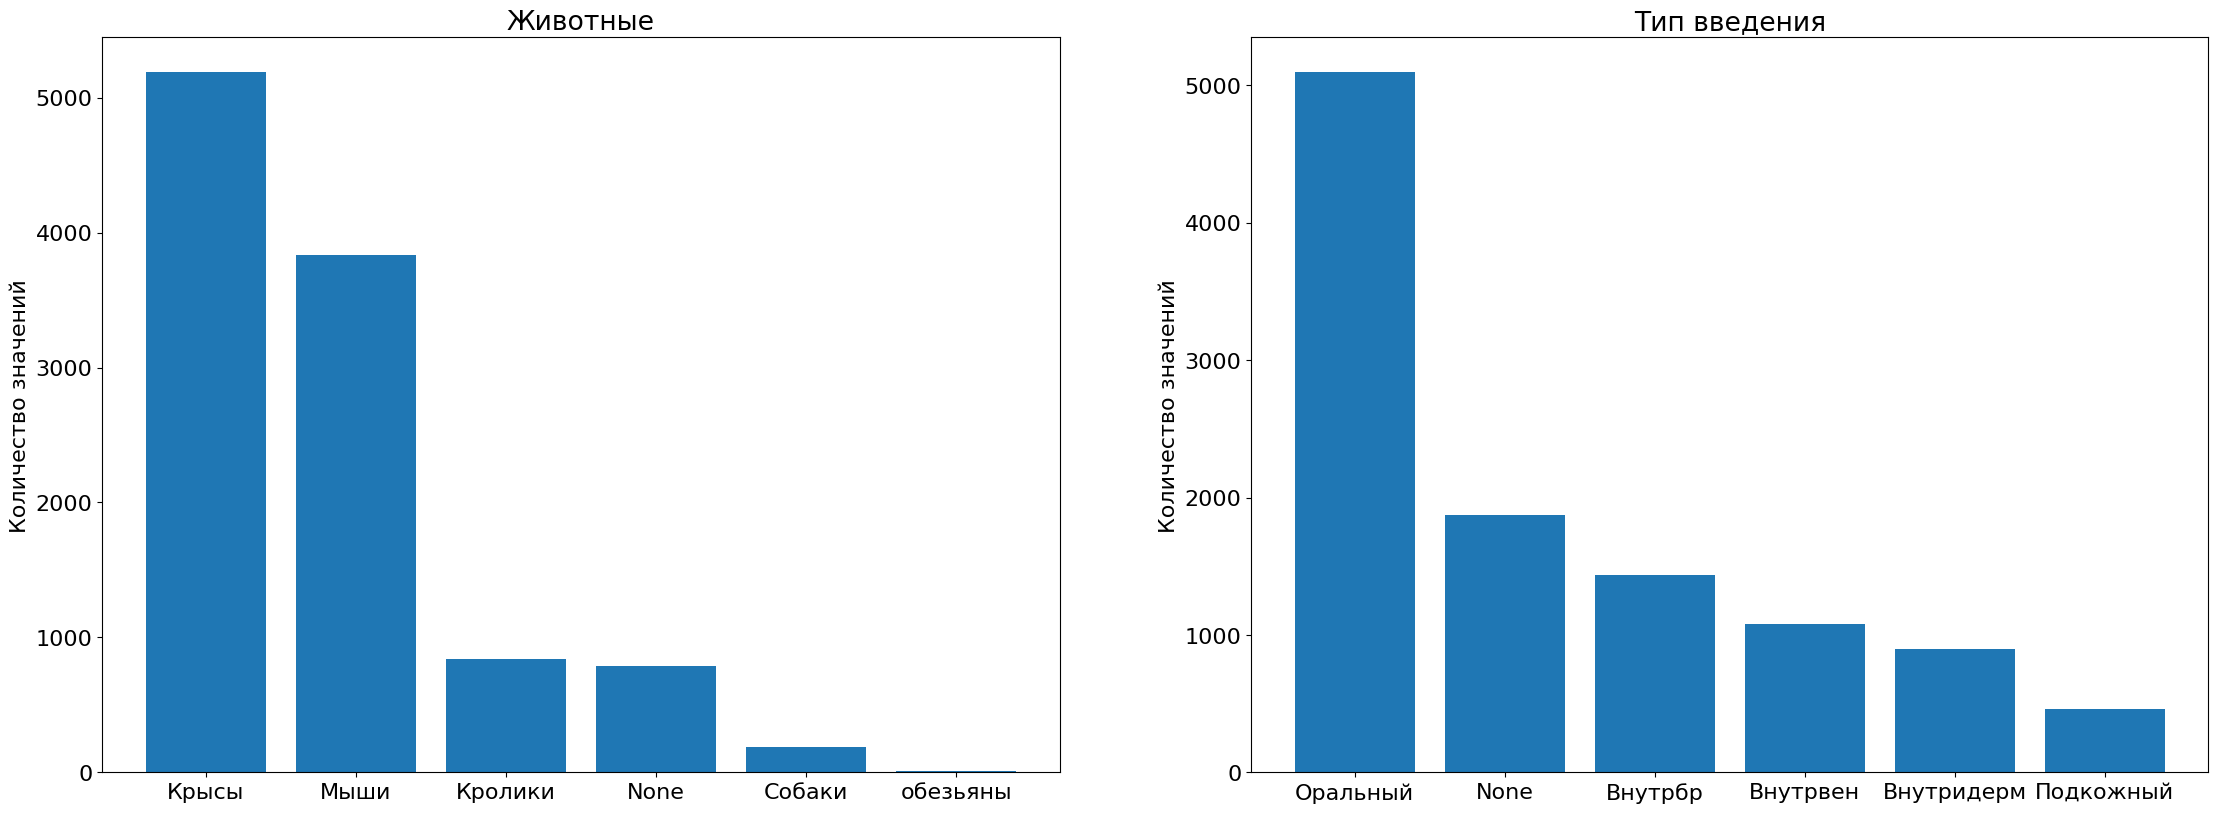

In [121]:
plt.figure(figsize=(42, 21))
plt.rcParams.update({'font.size': 16})
plt.subplot(2, 3, 1)
plt.bar(x_animals, y_animals)
plt.title('Животные')
plt.ylabel('Количество значений')

plt.subplot(2, 3, 2)
plt.bar(x_inj, y_inj)
plt.title('Тип введения')
plt.ylabel('Количество значений')

plt.show()


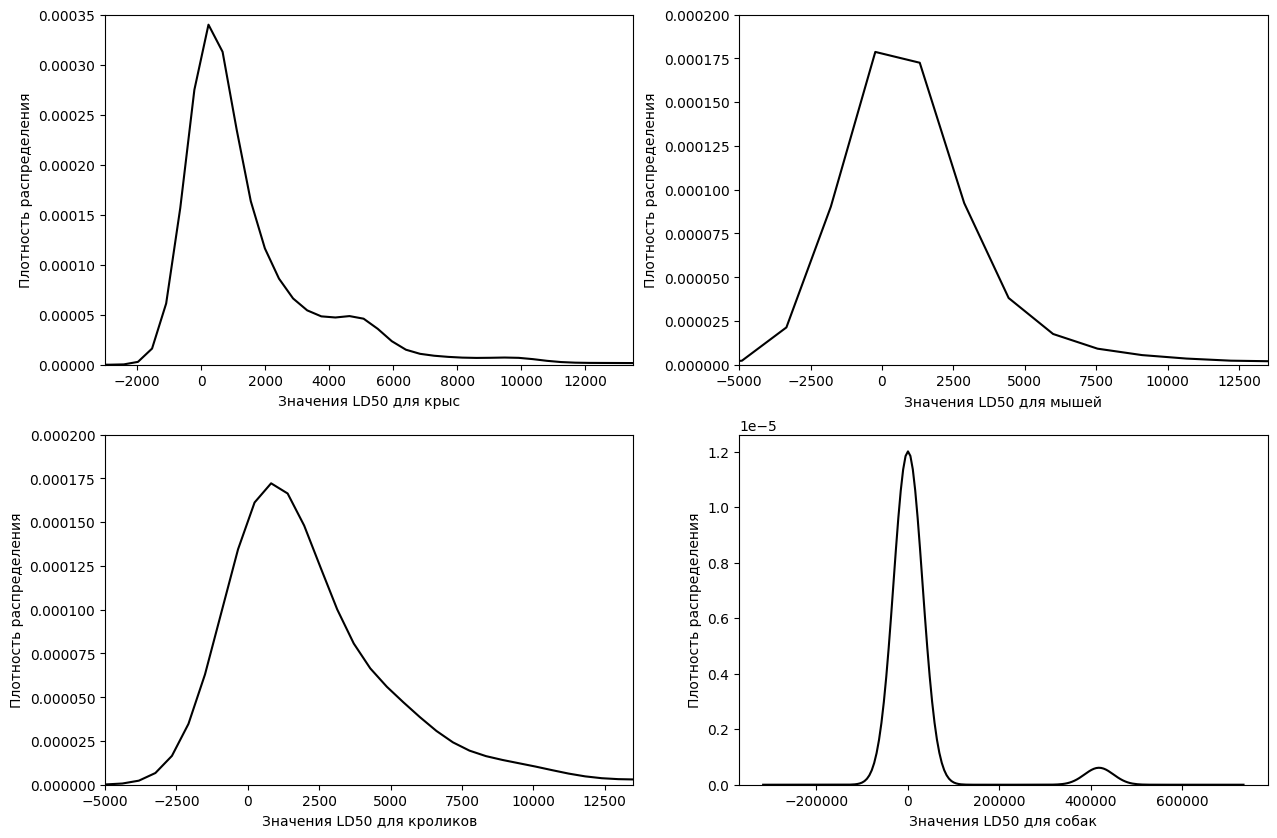

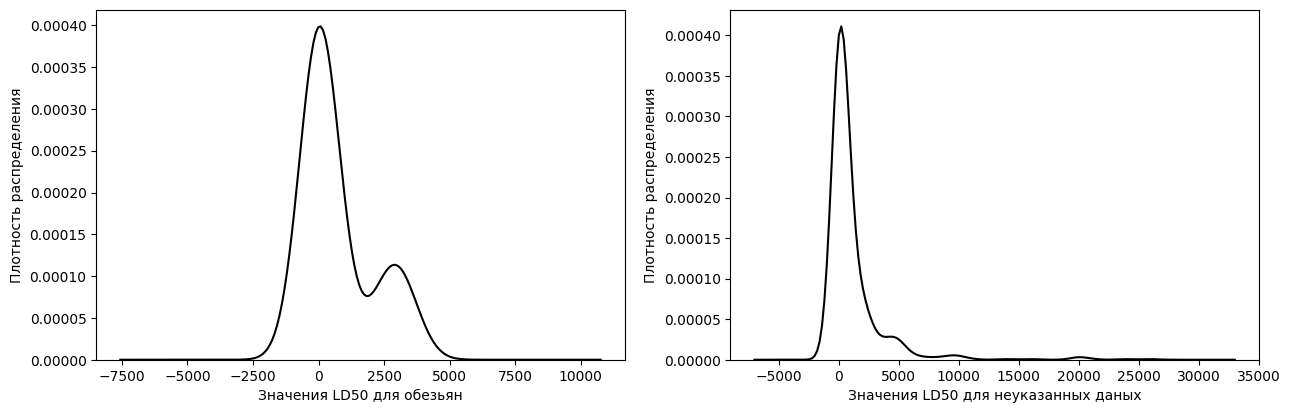

In [7]:
plt.figure(figsize=(15, 10))
# plt.hist(rat_hist, color = 'blue', edgecolor = 'black',
        # bins = 100)

plt.subplot(2, 2, 1)
sns.kdeplot(rat_hist, cut=10, color='black')
plt.ylabel('Плотность распределения')
plt.xlabel('Значения LD50 для крыс')
plt.xlim((-3000, 13500))
plt.ylim((0, 0.00035))

plt.subplot(2, 2, 2)
sns.kdeplot(mouse_hist, cut=10, color='black')
plt.xlabel('Значения LD50 для мышей') 
plt.ylabel('Плотность распределения')
plt.xlim((-5000, 13500))
plt.ylim((0, 0.00020))

plt.subplot(2, 2, 3)
sns.kdeplot(rabbit_hist, cut=10, color='black')
plt.xlabel('Значения LD50 для кроликов') 
plt.ylabel('Плотность распределения')
plt.xlim((-5000, 13500))
plt.ylim((0, 0.00020))

plt.subplot(2, 2, 4)
sns.kdeplot(dog_hist, cut=10, color='black')
plt.xlabel('Значения LD50 для собак')
plt.ylabel('Плотность распределения')


plt.show()

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.kdeplot(monkey_hist, cut=10, color='black')
plt.xlabel('Значения LD50 для обезьян')
plt.ylabel('Плотность распределения')


plt.subplot(2, 2, 2)
sns.kdeplot(none_animal_hist, cut=10, color='black')
plt.xlabel('Значения LD50 для неуказанных даных')
plt.ylabel('Плотность распределения')


plt.show()

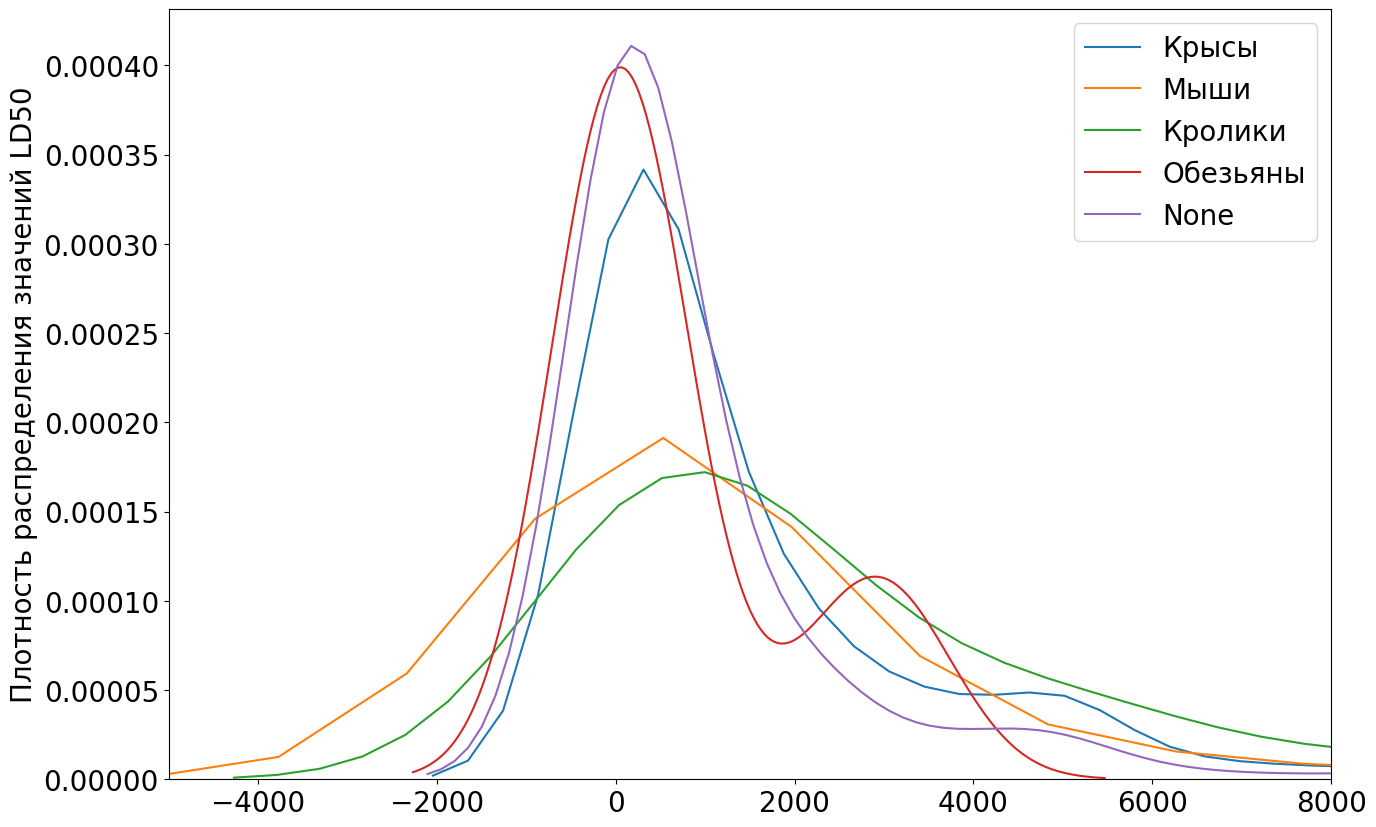

In [ ]:
plt.figure(figsize=(15, 10))
sns.kdeplot(rat_hist)
sns.kdeplot(mouse_hist)
sns.kdeplot(rabbit_hist)
sns.kdeplot(monkey_hist)
sns.kdeplot(none_animal_hist)
plt.legend(['Крысы', 'Мыши', 'Кролики', 'Обезьяны', 'None'])
plt.ylabel('Плотность распределения значений LD50')
plt.rcParams.update({'font.size': 24})
plt.show()

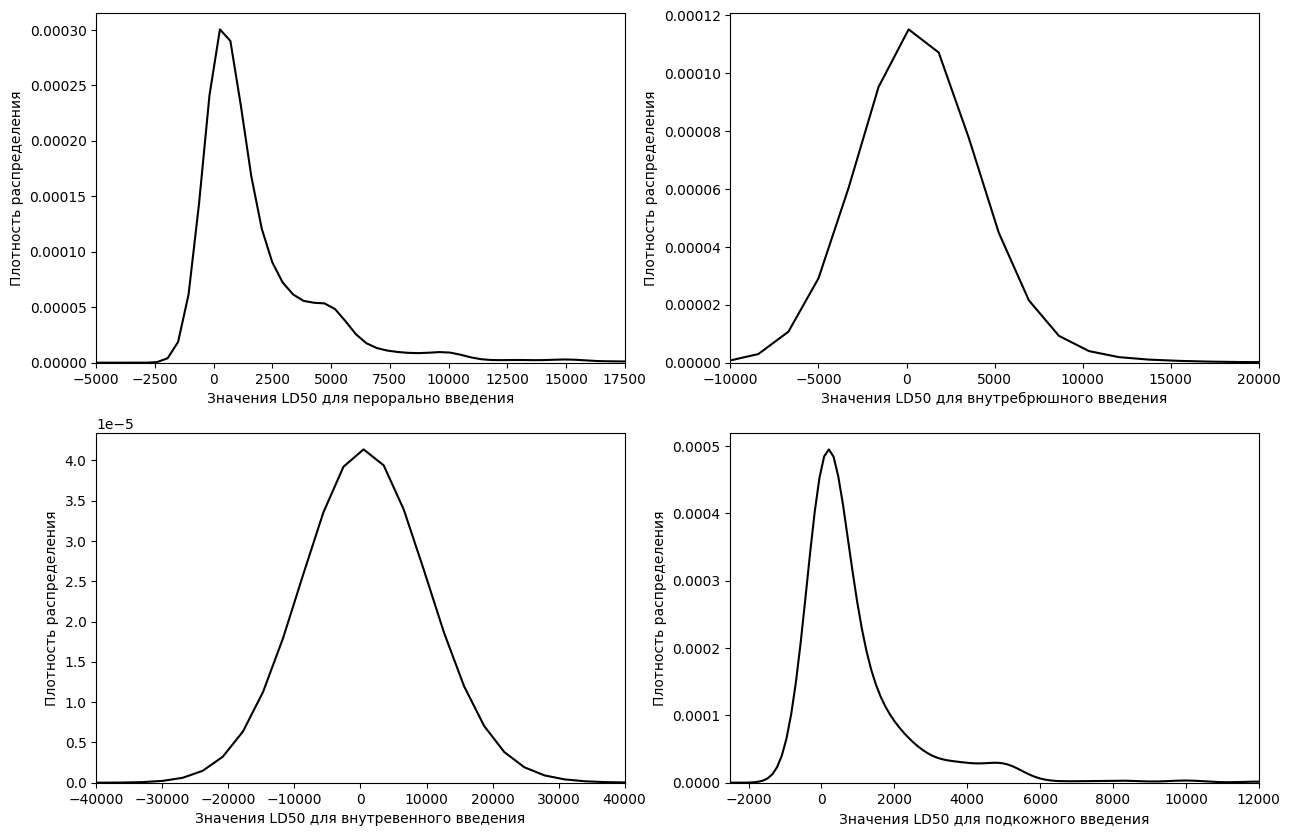

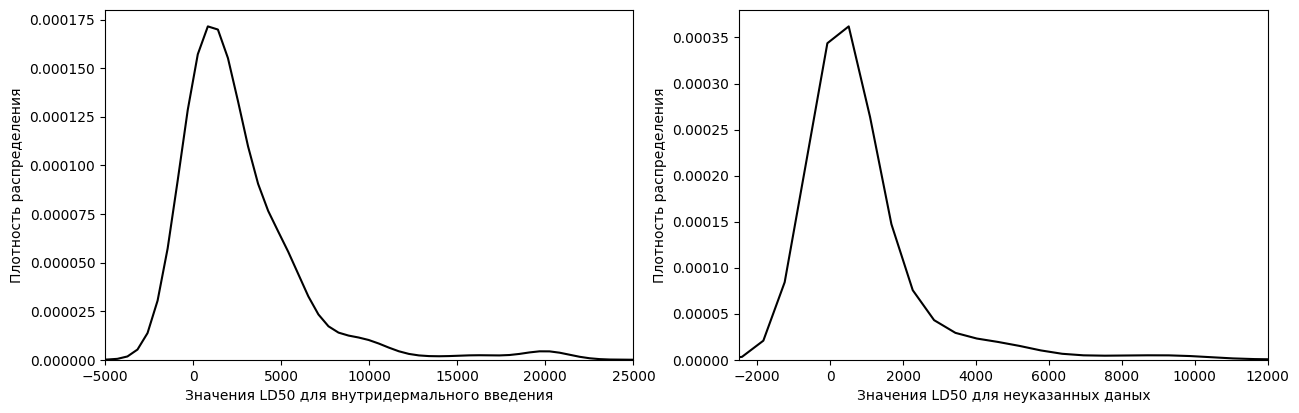

In [8]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.kdeplot(oral_hist, cut=10, color='black')
plt.xlim(-5000, 17500)
plt.ylabel('Плотность распределения')
plt.xlabel('Значения LD50 для перорально введения')


plt.subplot(2, 2, 2)
sns.kdeplot(ip_hist, cut=10, color='black')
plt.xlim(-10000, 20000)
plt.xlabel('Значения LD50 для внутребрюшного введения') 
plt.ylabel('Плотность распределения')

plt.subplot(2, 2, 3)
sns.kdeplot(iv_hist, cut=10, color='black')
plt.xlim(-40000, 40000)
plt.xlabel('Значения LD50 для внутревенного введения') 
plt.ylabel('Плотность распределения')

plt.subplot(2, 2, 4)
sns.kdeplot(sc_hist, cut=10, color='black')
plt.xlim(-2500, 12000)
plt.xlabel('Значения LD50 для подкожного введения')
plt.ylabel('Плотность распределения')


plt.show()

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.kdeplot(dermal_hist, cut=10, color='black')
plt.xlim(-5000, 25000)
plt.xlabel('Значения LD50 для внутридермального введения')
plt.ylabel('Плотность распределения')


plt.subplot(2, 2, 2)
sns.kdeplot(none_type_hist, cut=10, color='black')
plt.xlim(-2500, 12000)
plt.xlabel('Значения LD50 для неуказанных даных')
plt.ylabel('Плотность распределения')


plt.show()

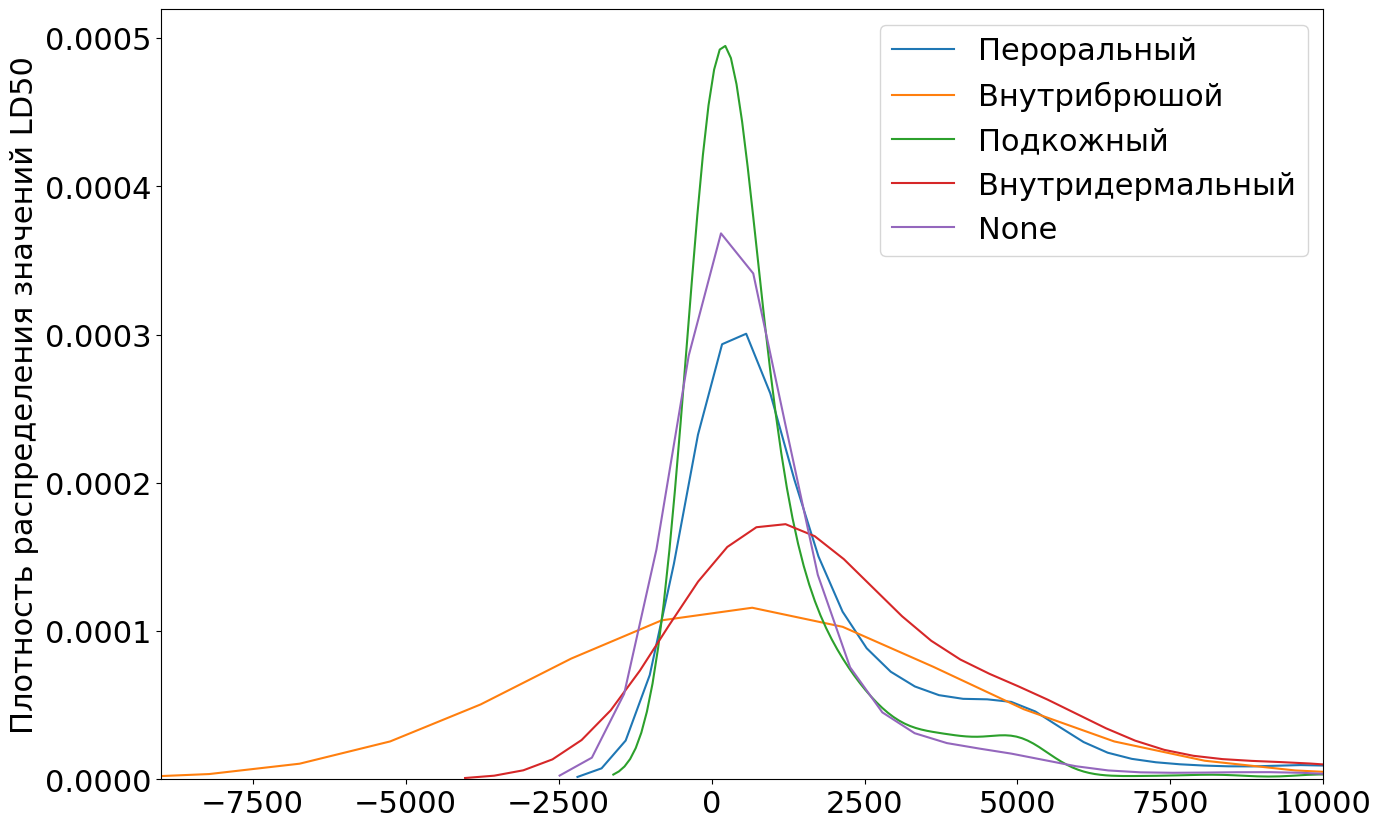

In [93]:
plt.figure(figsize=(15, 10))
sns.kdeplot(oral_hist)
sns.kdeplot(ip_hist)
sns.kdeplot(sc_hist)
sns.kdeplot(dermal_hist)
sns.kdeplot(none_type_hist)
plt.legend(['Пероральный', 'Внутрибрюшой', 'Подкожный', 'Внутридермальный', 'None'])
plt.ylabel('Плотность распределения значений LD50')
plt.xlim(-9000, 10000)
plt.rcParams.update({'font.size': 22})
plt.show()

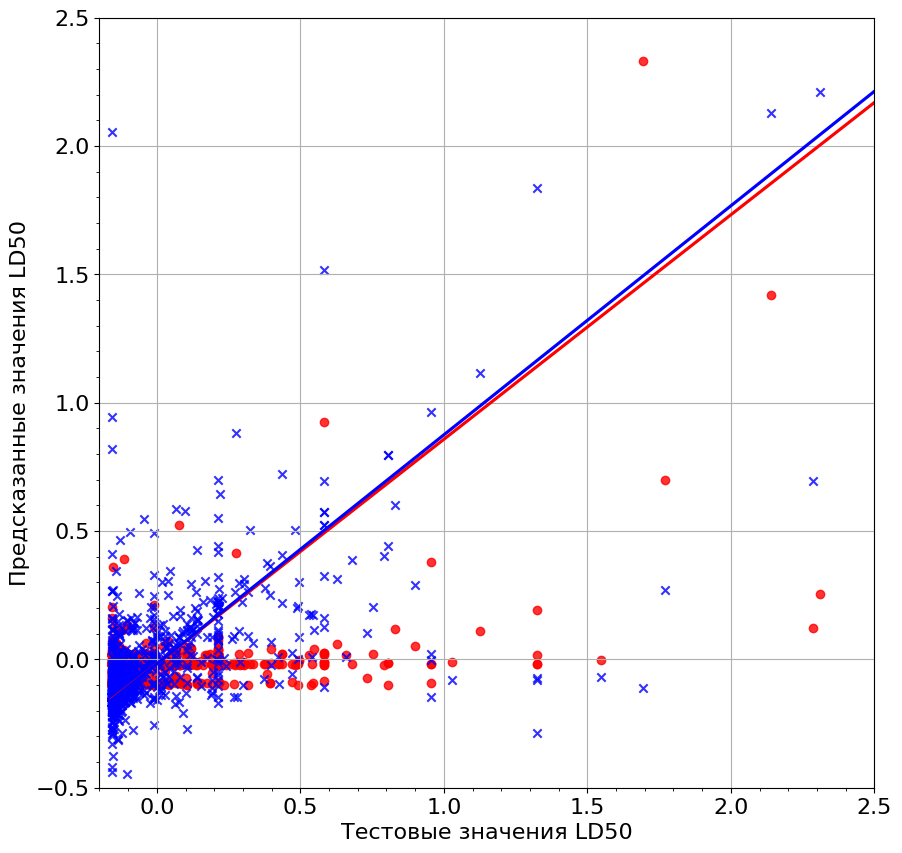

In [125]:
fig = plt.figure(figsize=(10, 10))
# lnx = [log(el) for el in y_test.ravel()]
# lny = [log(el) for el in y_pred_rf]
sns.regplot(x=y_test, y=y_pred_rf, fit_reg=True, color='red', ci=None, marker='o')
sns.regplot(x=y_test, y=y_pred_svm, fit_reg=True, color='blue', ci=None, marker='x')
plt.xlim(-.2, 2.5)
plt.xlabel('Тестовые значения LD50')
plt.ylim(-.5, 2.5)
plt.ylabel('Предсказанные значения LD50')
plt.grid()
plt.minorticks_on()
plt.show()
